In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import folium

In [14]:
train = pd.read_csv(r"C:\Users\raven\Downloads\sf-crime\train.csv\train.csv")
test  = pd.read_csv(r"C:\Users\raven\Downloads\sf-crime\test.csv\test.csv")

In [23]:
X = train[['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']]
Y = train['Category']

In [27]:
X.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [28]:
X.Address.value_counts()

800 Block of BRYANT ST           26533
800 Block of MARKET ST            6581
2000 Block of MISSION ST          5097
1000 Block of POTRERO AV          4063
900 Block of MARKET ST            3251
                                 ...  
PRECITA AV / CESAR CHAVEZ ST         1
0 Block of COLUSA PL                 1
2800 Block of KEITH ST               1
CABRILLO ST / ARGUELLO BL            1
OFARRELL ST / CYRIL MAGNIN ST        1
Name: Address, Length: 23228, dtype: int64

In [17]:
train_X, train_Y, test_X, test_Y = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [18]:
params = {'task':'train','boosting_type': 'gbdt','objective':'multiclass', 'metric':{'multi_logloss'}, 'num_class':3, 'learning_rate': 0.1, 'num_leaves':21, 'min_data_in_leaf':3, 'num_iteration':100}

In [20]:
lgb_train = lgb.Dataset(train_X, train_Y)
lgb_test = lgb.Dataset(test_X, test_Y, reference=lgb_train)

In [22]:
lgb_results = {}                                    # 学習の履歴を入れる入物
model = lgb.train(params=params,                    # ハイパーパラメータをセット
                  train_set=lgb_train,              # 訓練データを訓練用にセット
                  valid_sets=[lgb_train, lgb_test], # 訓練データとテストデータをセット
                  valid_names=['Train', 'Test'],    # データセットの名前をそれぞれ設定
                  num_boost_round=100,              # 計算回数
                  early_stopping_rounds=10)       # アーリーストッピング設定

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: Dates, DayOfWeek, PdDistrict, Resolution, Address

In [6]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


Text(0.5, 1.0, 'Crime Counts')

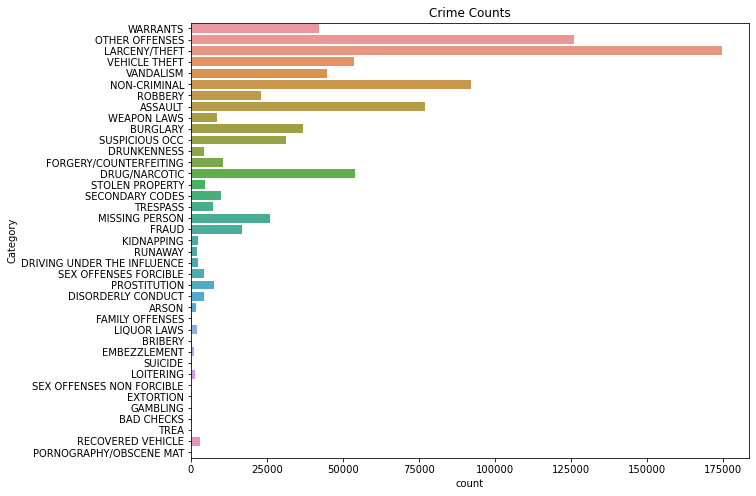

In [19]:
fig, ax  = plt.subplots(figsize = (10, 8))
cri_counts = sns.countplot(y = train['Category']) 
cri_counts.set_title('Crime Counts')